## Challenges
A private investor challenges you to build a **machine learning model**, which can
**identify lemons** with data they have acquired. It is your task to build the model(s)
for the customer. Keep in mind that it is important, that you provide the customer
with the whole data science workflow rather than for instance a thorough data
exploration. Note, you do not need to provide the customer with a saved model,
an expressive code suffices. Also, do not get hung up on trivialities. If there is a
column within the data, you do not understand – just leave it out.


### Lemons: a vehicle of inferior quality at an auction


## Table of Content
- [1 - Packages](#1)
- [2 - Loading the training data](#2)
- [3 -  Preprocessing the training data and generate new features](#3)
- [4 - start of the training part](#4)
    - [4.1 - Train, validation splits](#4-1)
    - [4.2 - Get Feeling of associations between features and if there are any features with clear separation between the two classes.](#4-2)
- [5 - Model selection and fitting the best model:](#5)

In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#!pip install seaborn
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

<a name='2'></a>
## 2 -  Loading the training data

In [24]:
df_orig = pd.read_csv('/Users/skharabian/sciebo/CV_2020/Interviews/StatW/lemons/data_lemons.csv', index_col='Unnamed: 0')

In [25]:
df_orig

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Model,SubModel,WheelType,VNZIP1,VehBCost,VNST,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice
0,52641,0,4/29/2010,MANHEIM,2006,4,IMPALA,4D SEDAN LS,Covers,39402,7135.0,MS,6798.0,8101.0
1,63946,0,8/26/2009,ADESA,2004,5,ASCENDER 2WD 6C 4.2L,SPORT UTILITY,Alloy,85226,5845.0,AZ,3842.0,4288.0
2,55565,0,5/17/2010,OTHER,2009,1,SEBRING 4C,4D SEDAN,Covers,74135,9200.0,OK,9156.0,9740.0
3,64700,0,12/8/2010,ADESA,2007,3,NITRO 4WD V6,4D SUV 3.7L SXT,Alloy,85226,9825.0,AZ,10922.0,12914.0
4,33335,0,1/27/2009,MANHEIM,2005,4,SONATA 4C 2.4L I4 MP,4D SEDAN,Covers,34761,5045.0,FL,3289.0,4603.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58381,7424,0,12/10/2009,MANHEIM,2006,3,ACCENT,4D SEDAN GLS,Covers,30272,6030.0,GA,5283.0,6121.0
58382,26933,0,11/16/2010,MANHEIM,2005,5,SPECTRA,4D SEDAN EX,Covers,75050,5825.0,TX,3757.0,4522.0
58383,4068,0,4/27/2010,OTHER,2006,4,IMPALA,4D SEDAN LS,Covers,75061,8275.0,TX,6917.0,8241.0
58384,58732,0,4/7/2010,MANHEIM,2005,5,TAURUS,4D SEDAN SE,NaN,98064,5195.0,WA,3794.0,4847.0


In [26]:
df_orig.replace('', np.nan, inplace=True)
df_orig['Model'].replace(300, np.nan, inplace=True)
df_orig['MMRAcquisitionAuctionAveragePrice'].replace(0.0, np.nan, inplace=True)




In [27]:
df = df_orig.dropna()
df
## So removed rows with any missing info. 


,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Model,SubModel,WheelType,VNZIP1,VehBCost,VNST,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice
0,52641,0,4/29/2010,MANHEIM,2006,4,IMPALA,4D SEDAN LS,Covers,39402,7135.0,MS,6798.0,8101.0
1,63946,0,8/26/2009,ADESA,2004,5,ASCENDER 2WD 6C 4.2L,SPORT UTILITY,Alloy,85226,5845.0,AZ,3842.0,4288.0
2,55565,0,5/17/2010,OTHER,2009,1,SEBRING 4C,4D SEDAN,Covers,74135,9200.0,OK,9156.0,9740.0
3,64700,0,12/8/2010,ADESA,2007,3,NITRO 4WD V6,4D SUV 3.7L SXT,Alloy,85226,9825.0,AZ,10922.0,12914.0
4,33335,0,1/27/2009,MANHEIM,2005,4,SONATA 4C 2.4L I4 MP,4D SEDAN,Covers,34761,5045.0,FL,3289.0,4603.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58380,30388,0,9/1/2010,MANHEIM,2006,4,ELANTRA,4D SEDAN,Covers,32824,5650.0,FL,4905.0,6111.0
58381,7424,0,12/10/2009,MANHEIM,2006,3,ACCENT,4D SEDAN GLS,Covers,30272,6030.0,GA,5283.0,6121.0
58382,26933,0,11/16/2010,MANHEIM,2005,5,SPECTRA,4D SEDAN EX,Covers,75050,5825.0,TX,3757.0,4522.0
58383,4068,0,4/27/2010,OTHER,2006,4,IMPALA,4D SEDAN LS,Covers,75061,8275.0,TX,6917.0,8241.0


<a name='3'></a>
## 3 -  Preprocessing the training data and generate new features

In [61]:
df['IsBadBuy'] = df['IsBadBuy'].astype('category') #Target
df['Auction'] = df['Auction'].astype('category') #Target
df["Auction"] = df["Auction"].cat.codes


df['Model'] = df['Model'].astype('category') #Target
df["Model"] = df["Model"].cat.codes



df['SubModel'] = df['SubModel'].astype('category') #Target
df["SubModel"] = df["SubModel"].cat.codes



df['WheelType'] = df['WheelType'].astype('category') #Target
df["WheelType"] = df["WheelType"].cat.codes


df['VNZIP1'] = df['VNZIP1'].astype('category') #Target
df['VNST'] = df['VNST'].astype('category') #Target
df["VNST"] = df["VNST"].cat.codes



df['VehYear'] = df['VehYear'].astype('category') #Target
df['PurchDate'] = pd.to_datetime(df['PurchDate'])



/Users/skharabian/miniconda3/envs/Conreg36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/skharabian/miniconda3/envs/Conreg36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/skharabian/miniconda3/envs/Conreg36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [62]:
df.describe(include='all')

/Users/skharabian/miniconda3/envs/Conreg36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Model,SubModel,WheelType,VNZIP1,VehBCost,VNST,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice
count,55229.000000,55229.0,55229,55229.000000,55229.0,55229.000000,55229.000000,55229.000000,55229.000000,55229.0,55229.000000,55229.000000,55229.000000,55229.000000
unique,NaN,2.0,514,NaN,10.0,NaN,NaN,NaN,NaN,152.0,NaN,NaN,NaN,NaN
top,NaN,0.0,2010-11-23 00:00:00,NaN,2006.0,NaN,NaN,NaN,NaN,32824.0,NaN,NaN,NaN,NaN
freq,NaN,49949.0,298,NaN,12972.0,NaN,NaN,NaN,NaN,2877.0,NaN,NaN,NaN,NaN
first,NaN,NaN,2009-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2010-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36485.824386,NaN,NaN,1.044107,NaN,4.166289,490.100020,288.378153,0.495428,NaN,6742.923263,16.598834,6214.296040,7475.100563
std,20954.868683,NaN,NaN,0.648727,NaN,1.710130,272.678459,182.504918,0.520425,NaN,1753.117073,12.521181,2372.029058,2606.543112
min,1.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1400.000000,0.000000,889.000000,1240.000000
25%,18375.000000,NaN,NaN,1.000000,NaN,3.000000,284.000000,140.000000,0.000000,NaN,5455.000000,4.000000,4370.000000,5513.000000


In [63]:
# Start with creating matrices for training. 
X = df.drop(['IsBadBuy', 'PurchDate'], axis=1)
y = df['IsBadBuy'].values

<a name='4'></a>
## 4 - start of the training part: 

<a name='4-1'></a>
### 4.1 - Train, validation splits:

In [64]:
# set a validation set aside: 
from sklearn.model_selection import train_test_split
X_train_df, X_test_df, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
X_train = X_train_df.values
X_test = X_test_df.values



In [65]:
X_train_df

,RefId,Auction,VehYear,VehicleAge,Model,SubModel,WheelType,VNZIP1,VehBCost,VNST,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice
8431,34586,1,2008,2,464,217,1,80022,8055.0,4,7604.0,8823.0
17370,18933,1,2002,7,928,602,0,80022,9715.0,4,7866.0,9087.0
309,24738,1,2003,7,864,477,0,32124,4100.0,5,2249.0,3350.0
57637,62020,0,2006,4,835,275,0,91752,5670.0,3,4736.0,5831.0
7384,38701,1,2007,2,933,691,1,76040,5600.0,32,7087.0,8228.0
...,...,...,...,...,...,...,...,...,...,...,...,...
51589,33918,1,2005,5,956,93,0,34761,6735.0,5,4838.0,6129.0
43958,71636,0,2003,7,906,375,0,28273,7360.0,19,5478.0,6786.0
42031,43030,1,2004,5,656,302,0,32124,8800.0,5,7112.0,8477.0
23942,33776,1,2008,2,96,140,1,34761,8485.0,5,8730.0,9577.0


In [66]:
print(y_train.value_counts())

0    33465
1     3538
dtype: int64


In [67]:
y_test.value_counts()

0    16484
1     1742
dtype: int64

<a name='4-2'></a>
### 4.2 - Get Feeling of associations between features and if there are any features with clear separation between the two classes. 

/Users/skharabian/miniconda3/envs/Conreg36/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  # This is added back by InteractiveShellApp.init_path()


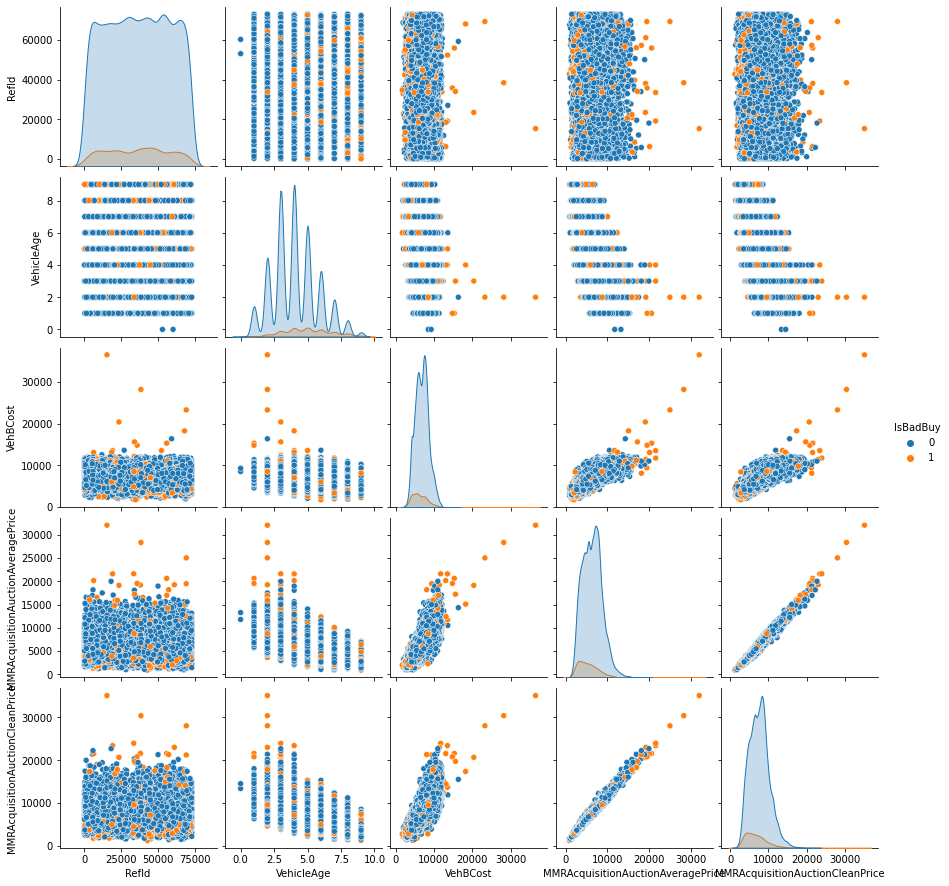

In [41]:
# Now only work on the training data:

# pairwise correlations

X_train_df.reset_index(inplace=True)
df_train = X_train_df.copy()
df_train.drop(['index'], axis =1, inplace=True)
df_train['IsBadBuy'] = y_train

# save the mean of each parameter for later use to impute the actual test missing values:
mean_impute = df_train.mean()
sb.pairplot(df_train, hue = 'IsBadBuy')

# Next steps: 
## We need to:
- Standardize the data
- perform classification

---> To choose the  best classifier, I used here Gridsearchcv

<a name='5'></a>
## 5 - Model selection and fitting the best model:

In [ ]:
### Testing mltiple pipelines: 

# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state=42))])



pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('clf', svm.SVC(random_state=42))])



# Set grid search params
C_OPTIONS = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 100, 1000]
param_range_fl = [1.0, 0.5, 0.1]
#param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

param_grid_lr = [{'clf__C': param_range_fl,
                  'clf__solver': ['liblinear']}]


grid_params_rf = [{'clf__criterion': ['gini', 'entropy']}]


#                       'clf__min_samples_leaf': param_range,
#                       'clf__max_depth': param_range,
#                       'clf__min_samples_split': param_range[1:]
                        
                        
param_grid_svm = [{'clf__C': C_OPTIONS,
                   'clf__kernel': ['linear', 'rbf']}]






# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
                     param_grid=param_grid_lr,
                     scoring='accuracy') 



gs_rf = GridSearchCV(estimator=pipe_rf,
                     param_grid=grid_params_rf,
                     scoring='accuracy') 



gs_svm = GridSearchCV(estimator=pipe_svm,
                      param_grid=param_grid_svm,
                      scoring='accuracy') 





###
grids = [gs_lr, gs_svm,gs_rf]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 
             1: 'Support Vector Machine',
             2: 'Random Forest'}


# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search	
    gs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])






Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 0.5, 'clf__solver': 'liblinear'}
Best training accuracy: 0.904
Test set accuracy score for best params: 0.904 

Estimator: Support Vector Machine
